# Employee Attrition: Cleaning, Vizualizatin, OLS

"What makes employees leave the company?" 

Hiring new employees implies direct (interviewing, search,...) and indirect (team-building, informal learning, ...) cost and companies are trying to keep their employees. Therefore,  companies are looking for insides from data to undestand which employees are leaving to company to ultimately reduce the attrition rate in the future.

# Analysis includes



Data cleaning 

Visualization 
- histogram 
- scatter plot with multiple variables 
- scatter plot for 2 variables
- violin plot 
- linear regession to scatter plot 
- Correlation heatmap 
& interpretations 

OLS Analysis 
& interpretations 

The data is publically avaialbe and shows data from a consulting company. 

In [1]:
#import necessary libaries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline      
import seaborn as sns
sns.set_style("darkgrid")


#get the data and give it a good name  (df for DataFrame)
hr_df = pd.read_csv ("../input/attrition/HR_Employee_Attrition.csv")
hr_df.head() #good to get a first "feel" about the data, shows by default the first 5 lines

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
"""
first of all we have to twirk around a bit with the options we are seing 

this is important when we will later obsere our cleaned data 
"""

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

 # Concatenate (link together) 


Deleting the varialbes that are of no use for the analyzis
they are: count, number, standardHours

    
Why deleting redundant or unnessesary data: because we are intersted in what realy drives the attriton
    and without any statistical analysis we can say that a value that is same for 
    ever employee does not change a thing
    (arguably, the employee ID could actually have a effect on the attrtion
    as it could indicate the lenght of the employee being in the company, 
    but, as we aready established above, the years in the company are given 
    seperately and we don´t know if the ID has just been given randomly)

In [3]:
#we con not .loc everything we want as want after the chance of the .loc 

hr_df_firstpart = hr_df.loc[:, ["Age", "Attrition", "BusinessTravel", "DailyRate", "Department", "DistanceFromHome", "Education", "EducationField"]]
#the second line was just there for me to check if the slicing has worked properly 
hr_df_firstpart

hr_df_secondpart = hr_df.loc[: , ["RelationshipSatisfaction"]]
hr_df_secondpart

hr_df_thirdpart = hr_df.loc [: , ["StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]]
hr_df_thirdpart


"""
we bring all datasets together again

NOTE: first takes all the DataFrames and than you have to pass on the axis (by default = 0 (== rows))
    you don´t want to sort anything so you are good advised to change the default of sort to False 
"""

sns.set_style("whitegrid")
#here the true concatenation takes place 
new_df = pd.concat ([hr_df_firstpart, hr_df_secondpart, hr_df_thirdpart], axis = 1, sort = False)
new_df.head()


#if ony two sets of data have to be put togther there is a simpler way. 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,4,1,6,3,3,2,2,2,2


In [4]:
"""
I have shown you how to delete something manually. 
But, Python offers an easy solution 
    
    del df_name ["column_name"]
    
    "EmployeeNumber", "StandardHours
    
    
NOTE: if you start form a point after the line one, you get an error running this line 
    the reason for that is that you can not delete something twice! 
    
    
"""

#unfortunately, I have to show it to you in that way, as you can not 
#delete something that twice! (the hr_df.head() is only to check what I still have to delete)


del hr_df ["EmployeeCount"]
hr_df.head()




#for the other variables I show a nother version 
#note: the axis has to be passed on again 

#again: sorry but I can run it twice so with "#" that you see what I have done

hr_df = hr_df.drop ("EmployeeNumber", axis = 1)
hr_df.head()


#now if you don´t want to reasign the DataFrame, set inplace = True

hr_df.drop("StandardHours", axis = 1, inplace = True)

hr_df.head()




,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,1,6,3,3,2,2,2,2


In [5]:
#inspect the data, to see if there are NaN or 0 values we have to replace
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

The data does not has any NaN so we don´t have to replace anything 

In [6]:
#general idea about the dataset 

hr_df.shape #no brackets needed as this value is already calculated


(1470, 32)

In [7]:

#OVERVIEW: we see an statistical overview


round (hr_df.describe())

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0
mean,37.0,802.0,9.0,3.0,3.0,66.0,3.0,2.0,3.0,6503.0,14313.0,3.0,15.0,3.0,3.0,1.0,11.0,3.0,3.0,7.0,4.0,2.0,4.0
std,9.0,404.0,8.0,1.0,1.0,20.0,1.0,1.0,1.0,4708.0,7118.0,2.0,4.0,0.0,1.0,1.0,8.0,1.0,1.0,6.0,4.0,3.0,4.0
min,18.0,102.0,1.0,1.0,1.0,30.0,1.0,1.0,1.0,1009.0,2094.0,0.0,11.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,30.0,465.0,2.0,2.0,2.0,48.0,2.0,1.0,2.0,2911.0,8047.0,1.0,12.0,3.0,2.0,0.0,6.0,2.0,2.0,3.0,2.0,0.0,2.0
50%,36.0,802.0,7.0,3.0,3.0,66.0,3.0,2.0,3.0,4919.0,14236.0,2.0,14.0,3.0,3.0,1.0,10.0,3.0,3.0,5.0,3.0,1.0,3.0
75%,43.0,1157.0,14.0,4.0,4.0,84.0,3.0,3.0,4.0,8379.0,20462.0,4.0,18.0,3.0,4.0,1.0,15.0,3.0,3.0,9.0,7.0,3.0,7.0
max,60.0,1499.0,29.0,5.0,4.0,100.0,4.0,5.0,4.0,19999.0,26999.0,9.0,25.0,4.0,4.0,3.0,40.0,6.0,4.0,40.0,18.0,15.0,17.0


Observation: 
- the data is complet and seems normaly distributed (indicated by median and mean close)
- the variable we are interest (attrition yes /no) in is missing (as it is of the type object) 
- and what is with the gender, educationfied, department,... we have to convert them to get them into the statistc 
- just nice to know: why are we doing all the convertion? because we are speaking with an computer that does not know what "Sales" means, but can handle numberical data very efficent and without errors 

# DUMMY Variables 

with get_dummies ()
pandas does assign each value to ether true or false 

if there are more than two types (e.g. Department than there will generate new variables)

In [8]:

dummy_gender = pd.get_dummies(hr_df ["Gender"])
dummy_gender.head()

,Female,Male
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1


In [9]:
#NOTE: we can always delete the default dummy, is it is perfectly correlated with the non-default dummy (for binary variables)

#again writne like that, because we already changed it before! 

hr_df ["Gender"] = dummy_gender ["Female"]


In [10]:
""" 
the unit8 means: we have changed the datatype sucessfully and the 
type is no a positive whole number between 0-255

"""

hr_df.dtypes


Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                       uint8
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany      

In [11]:
#convertion of the varialbes we want to have as dummies 
hr_dummy = pd.get_dummies(hr_df, columns=["Attrition", "JobRole", "Gender", "BusinessTravel", "Department", "EducationField","MaritalStatus","Over18", "OverTime"])
hr_dummy.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_0,Gender_1,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0


In [12]:

hr_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PercentSalaryHike   

Yes, indeed, it worked all data is now a intand obviously we have more variables as we had to split them up! 


We are now sorting the DataFrame to have the variable we are most interested in in the beginnging (attrition)

- we do that by pop () and insert()


In [13]:
"""remove the variable of interst 
from the data and safe it in a new dataFrame

"""

col_of_interest = "Attrition_No"
first_col= hr_dummy.pop (col_of_interest)
first_col.head()

0    0
1    1
2    0
3    1
4    1
Name: Attrition_No, dtype: uint8

In [14]:
"""
now we insert the variable (on the first possition)

and we have a look if it worked! 
"""
#we have to write it like that because otherwise we get an error (that the attribute already exist) by running it aother time 
hr_dummy.insert(0, col_of_interest, first_col)
hr_dummy.head()

,Attrition_No,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_0,Gender_1,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1
1,1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0
2,0,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1
3,1,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1
4,1,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0


## DELETE of unessesary attributes!

In [15]:
hr_dummy.shape

(1470, 54)

In [16]:
"""
note: you have to specify the axis to 1 because we are intrested in deleting only colums and all values under it
"""

hr_dummy = hr_dummy.drop (["Attrition_Yes", "Gender_1", "OverTime_Yes"], axis = 1)

hr_dummy.head()

,Attrition_No,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_0,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No
0,0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0
1,1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,1
2,0,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0
3,1,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
4,1,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1


## Visual Represenation

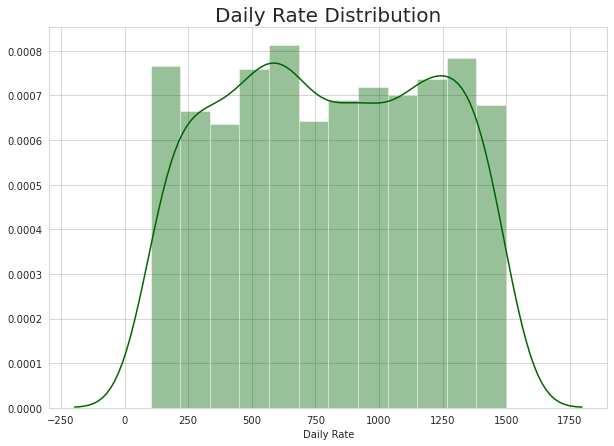

In [17]:
#histogram for daily rate with seaborn as sns 

#shows histogram and KDE for univariate distribution in one step

fig =sns.distplot(a= hr_dummy["DailyRate"], kde= bool, color = "darkgreen", norm_hist = True, axlabel= "Daily Rate")
fig.set_title("Daily Rate Distribution", fontsize = 20)
fig.figure.set_size_inches (10,7)
plt.show()


# Barplots 

compares two things with one another



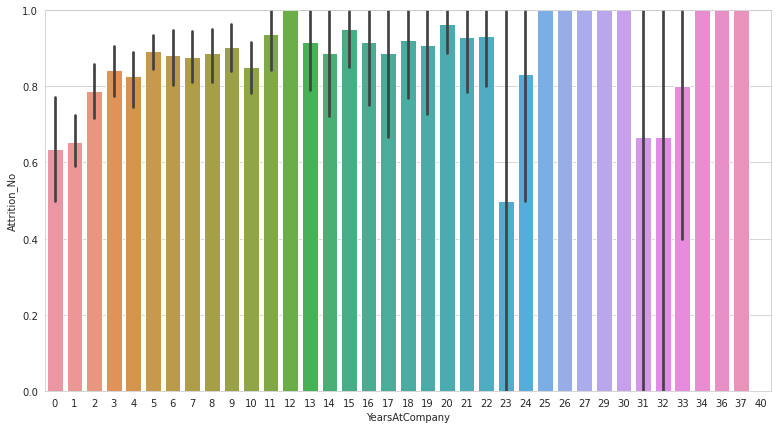

In [18]:
"""

"""
plt.ylim(0, 1)
figure = sns.barplot(hr_dummy["YearsAtCompany"], hr_dummy ["Attrition_No"])

figure.figure.set_size_inches (13,7)
plt.savefig("Age_Attrition.png")
plt.show()


Note: cupped at one as an employee can ether leave or stay but not leave more than once!

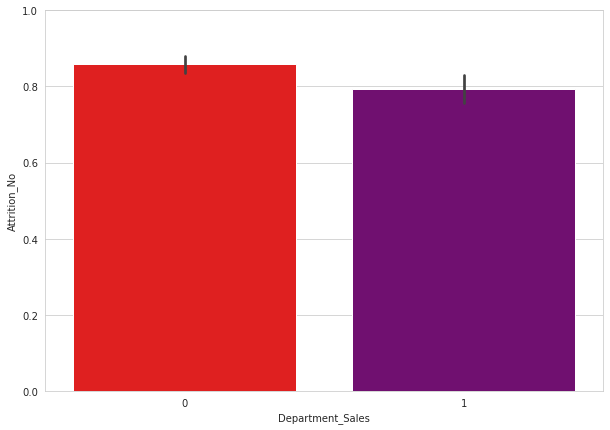

In [19]:

#we change the colors to have a bit of variety in it 

#hear we are using the dataFrame before we have assigned the dummy variables
plt.ylim(0, 1)
fig = sns.barplot(hr_dummy["Department_Sales"], hr_dummy ["Attrition_No"], palette = ["red", "purple", "pink"])
fig.figure.set_size_inches (10,7)
plt.show()


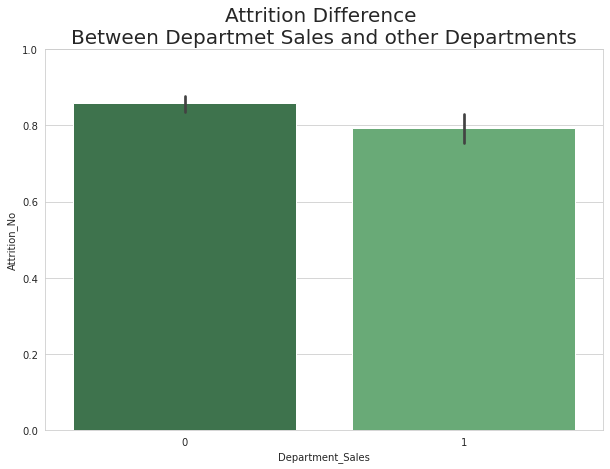

In [20]:
#we change the colors to have a bit of variety in it 

#here we have a color that is shaded of the categories 
plt.ylim(0, 1)
figure = sns.barplot(hr_dummy["Department_Sales"], hr_dummy ["Attrition_No"], palette = "Greens_d")
figure.figure.set_size_inches (10,7)
figure.set_title ("Attrition Difference \nBetween Departmet Sales and other Departments", fontsize = 20)
plt.show()


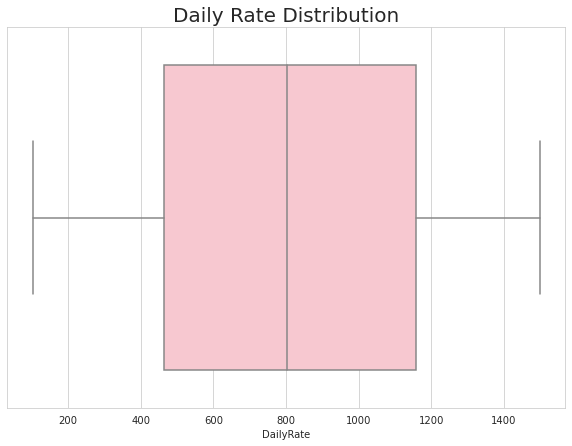

In [21]:
figure = sns.boxplot(hr_dummy["DailyRate"], color = "pink") 
figure.figure.set_size_inches (10,7)
figure.set_title("Daily Rate Distribution", fontsize =20)

plt.show()

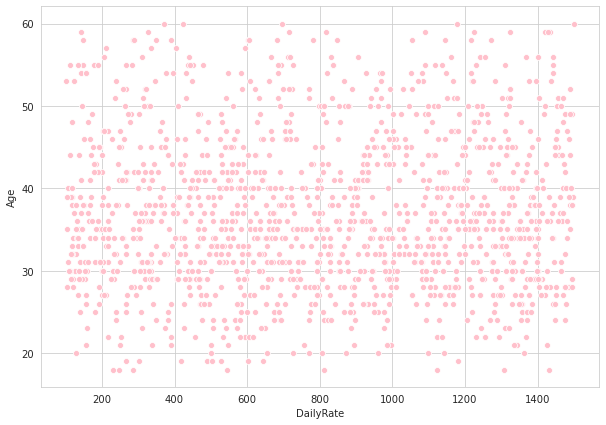

In [22]:
#scatter plot of daily rate and age 


figure = sns.scatterplot(hr_df["DailyRate"], hr_df["Age"], color = "pink")

figure.figure.set_size_inches (10,7)
#interpretation: seamingly no realationship 


plt.show()

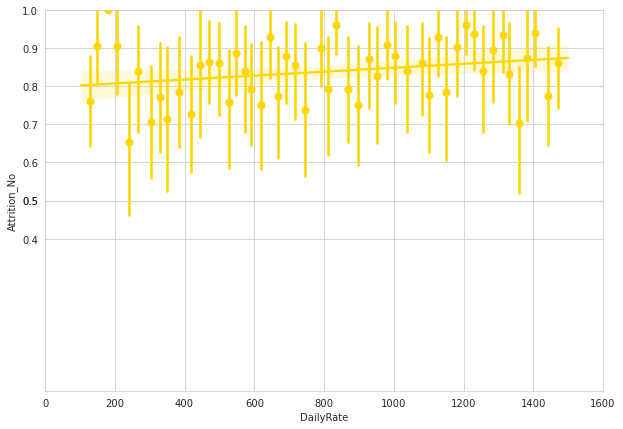

In [23]:
"""adding a regession to the data

regplot is very flexible (accepts different data types, )

x_bins: makes it more readable and basically puts all data into 
50 discrete bins, symontaniously it shows the confidence internal, the regression is still theorginal data"""  

plt.ylim(0, 1)
figure = sns.regplot(hr_dummy["DailyRate"], hr_dummy["Attrition_No"], x_bins = 50, color= "gold")

figure.figure.set_size_inches (10,7)
#persumably we dont knot the highest value we can insert a max () funcktin
plt.yticks ([0.4, 0.5, 0.5,0.6,0.7,0.8,0.9, max(hr_dummy["Attrition_No"]) ])

#though out I will demonstrate different possibilies to set the axis 
# >> this is by far my prefered option to set the ticks 
plt.xticks(np.arange (0,1800, step = 200))
#interpretation: almost no relationship and if very low (but positive) 

plt.show()

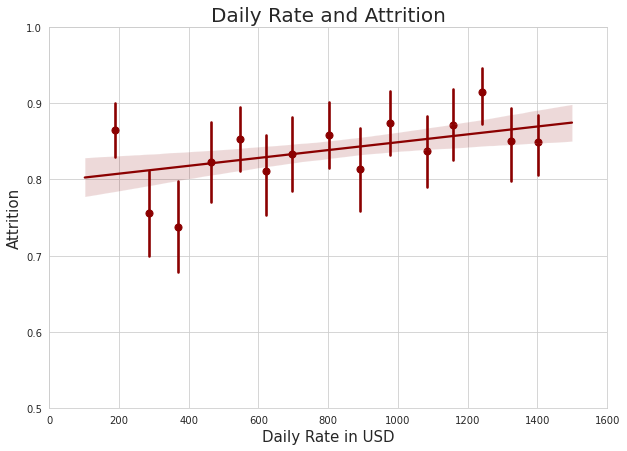

In [24]:
#what we see is a slight positiive correlation 
#we are showing the data with less bins 
#NOTE: the regression is made with the Unbinnded data 
plt.title ("Daily Rate and Attrition", fontsize= 20)

figure = sns.regplot(hr_dummy["DailyRate"], hr_dummy["Attrition_No"], x_estimator=np.mean, x_bins = 15, color = "darkred", ci = 80)
figure.figure.set_size_inches (10,7)
plt.xlabel("Daily Rate in USD", fontsize = 15)
plt.ylabel("Attrition", fontsize = 15)
plt.yticks ([0.5,0.6,0.7,0.8,0.9,1])
plt.xticks([0, 200,400,600,800,1000,1200,1400,1600])
plt.show()

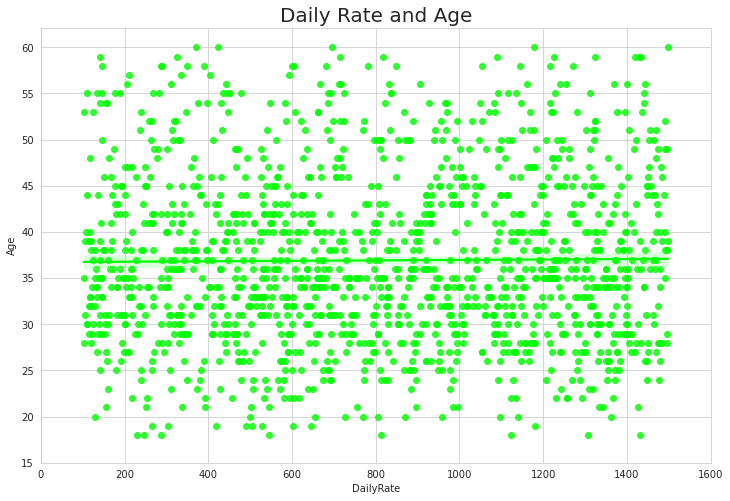

In [25]:
"""just to demonstrate what happens if we are not binning at all: 
 -->> we can basically only observe that the data seams not have no influence with one another (no correlation)
 
 ci = confidence interval between 0 and 100
 
 color, can be choosen from all colors in python 
     for the color code, just google: color code python and you get a list 
    if you want to have a quick solution: you can basically use 
    all comon colors with dark or light before them and get a lot of nice colors 
    
    note: all liberies have a slightly different color code, but you can always include 
    the package in your google search :)
 """
plt.figure(figsize = (10,7))
plt.title ("Daily Rate and Age", fontsize = 20)

x= hr_df["DailyRate"]

y= hr_df["Age"]
regressions_graph=sns.regplot(x,y, color = "lime", ci= 90)
plt.yticks(np.arange(15, 65, step = 5))
plt.xticks(np.arange(0,1700,step=200))
regressions_graph.figure.set_size_inches (12,8)
plt.show()

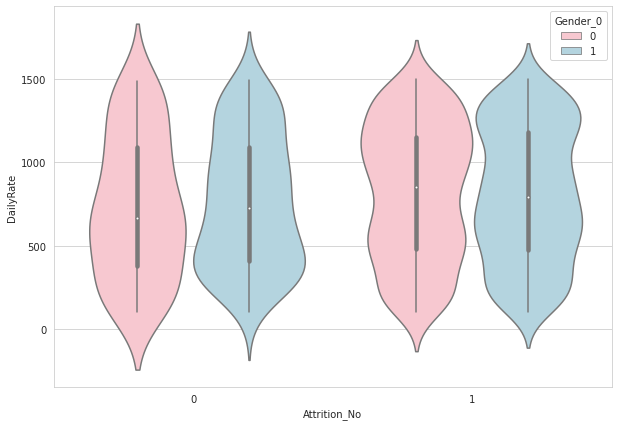

In [26]:
"""
lets explore some other data viz types 

that is already a bit more intersting, we see that the big belly in the blue 
graphs is lower than the one in the orange no graph, that could show a slight indication 
that people who left the company morelikely a lower sallary (irgnoring how 
many people we have in the two categories)
"""

figure = sns.violinplot(hr_dummy["Attrition_No"],hr_dummy["DailyRate"], palette= ["pink", "lightblue"], hue = hr_dummy ["Gender_0"])
figure.figure.set_size_inches (10,7)
plt.show()

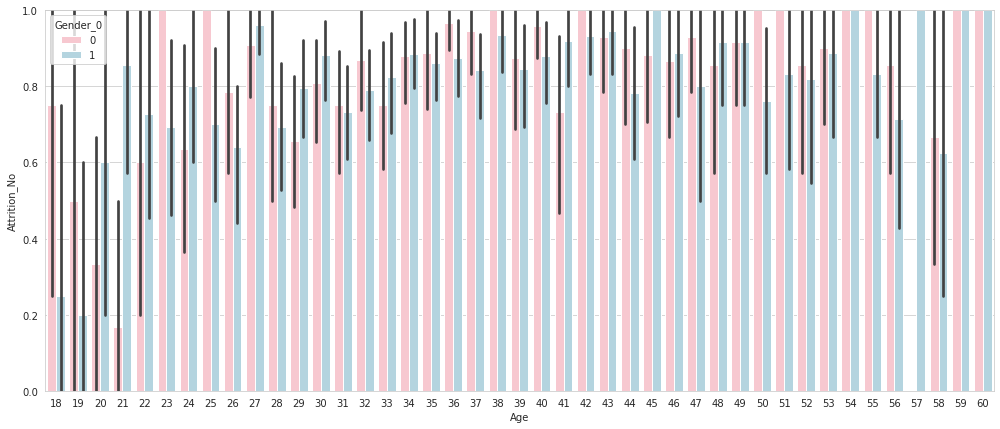

In [27]:
"""The same with a bar plot and truncated axis"""
plt.ylim(0, 1)
bins= [np.arange(15,65,step=10)]

figure = sns.barplot(hr_dummy["Age"],hr_dummy["Attrition_No"], palette= ["pink", "lightblue"], hue = hr_dummy ["Gender_0"])
figure.figure.set_size_inches (17,7)
plt.show()

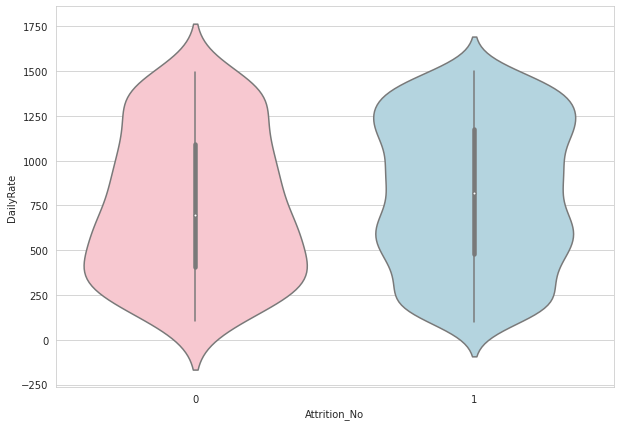

In [28]:
"""
lets explore some other data viz types 

that is already a bit more intersting, we see that the big belly in the blue 
graphs is lower than the one in the orange no graph, that could show a slight indication 
that people who left the company morelikely a lower sallary (irgnoring how 
many people we have in the two categories)
"""

figure = sns.violinplot(hr_dummy["Attrition_No"],hr_dummy["DailyRate"], palette= ["pink", "lightblue"])
figure.figure.set_size_inches (10,7)
plt.show()

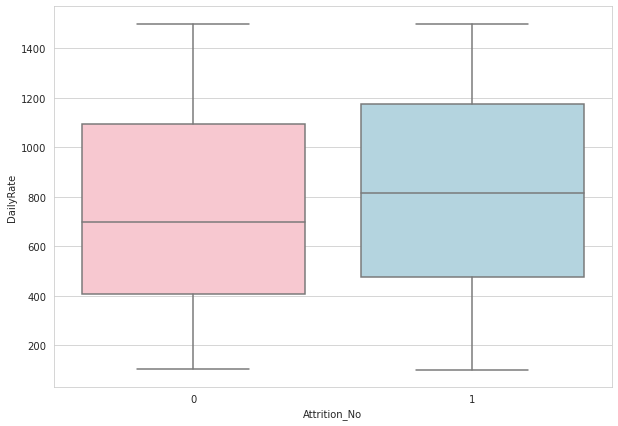

In [29]:
"""
An extremly related (less intuiteve but more intersting for statistical evaluations)
chart is the boxplot 
we clearly see here: the median daily rate of a person who left (attriton: yes) is lower 
than for a person who stayed 

further: we see that the spread of the two distributions is very similair
so wie have people erarning a lot and a litte per day in both categories 
"""

figure = sns.boxplot(hr_dummy["Attrition_No"],hr_dummy["DailyRate"], palette= ["pink", "lightblue"])
figure.figure.set_size_inches (10,7)
plt.show()

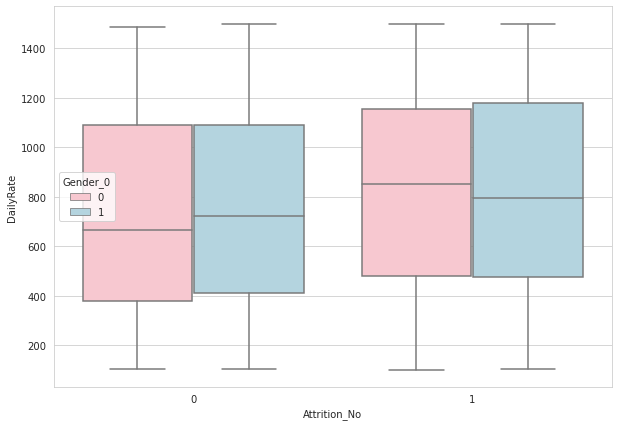

In [30]:
"""
An extremly related (less intuiteve but more intersting for statistical evaluations)
chart is the boxplot 
we clearly see here: the median daily rate of a person who left (attriton: yes) is lower 
than for a person who stayed 

further: we see that the spread of the two distributions is very similair
so wie have people erarning a lot and a litte per day in both categories 
"""

figure = sns.boxplot(hr_dummy["Attrition_No"],hr_dummy["DailyRate"], palette= ["pink", "lightblue"], hue =hr_dummy ["Gender_0"])
figure.figure.set_size_inches (10,7)
plt.show()

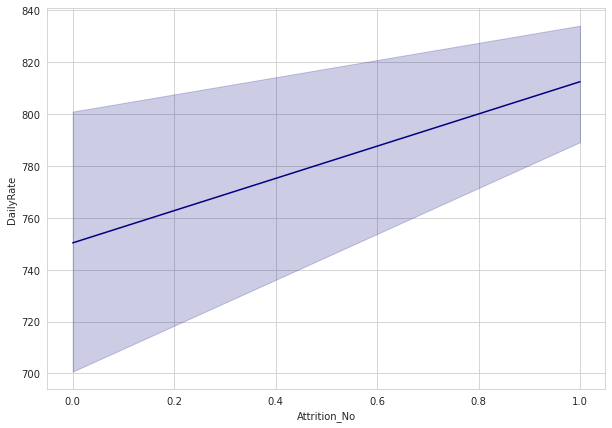

In [31]:
"""
that looks intersting, however, there is a huge catch! 
this graph by default is basically misleading and should not be used 
the y axis is only from 680-ish to 840-ish and ignores the values below
I show you how to change the axis and we see the a more similar picture 
than we have seen before ...
"""

figure = sns.lineplot(x = hr_dummy["Attrition_No"],y = hr_dummy["DailyRate"], color = "navy")
figure.figure.set_size_inches (10,7)
plt.show()

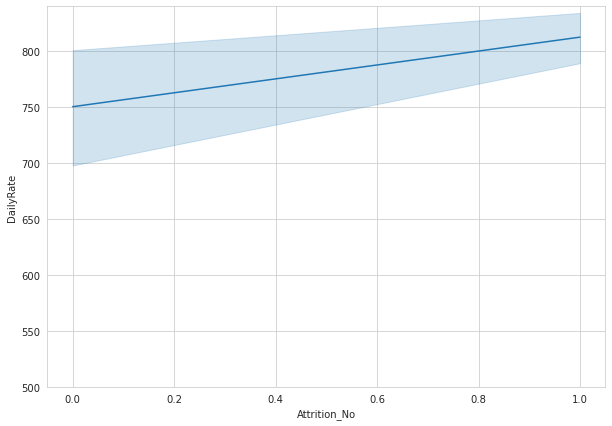

In [32]:
#we take a value (500 between the min daily rate and the python suggested one )

plt.ylim(500, 840)
figure = sns.set_style("whitegrid")
figure = sns.lineplot(x = hr_dummy["Attrition_No"],y = hr_dummy["DailyRate"])
figure.figure.set_size_inches (10,7)
plt.show()

please not we can also make histgrams with pure python, but I tell you, they are ot very handy to analyze and offer less options, and also why not using the great libaries that are out there



## Matplotlib.pyplot and Pandas 

-->> so going to the next one: Matpotlib and Pandas (my favorits, you will see why) 

"""
the first and formost cool thing about pandas is that you can read from loootts
of different data sources (e.g. excel, internet sources, csv (comma - 
sepperated values ....))

the you ether build an DataFrame (we have done that) if you have 2 dimensional 
data or you create a series 
"""


# Correlation Heatmap

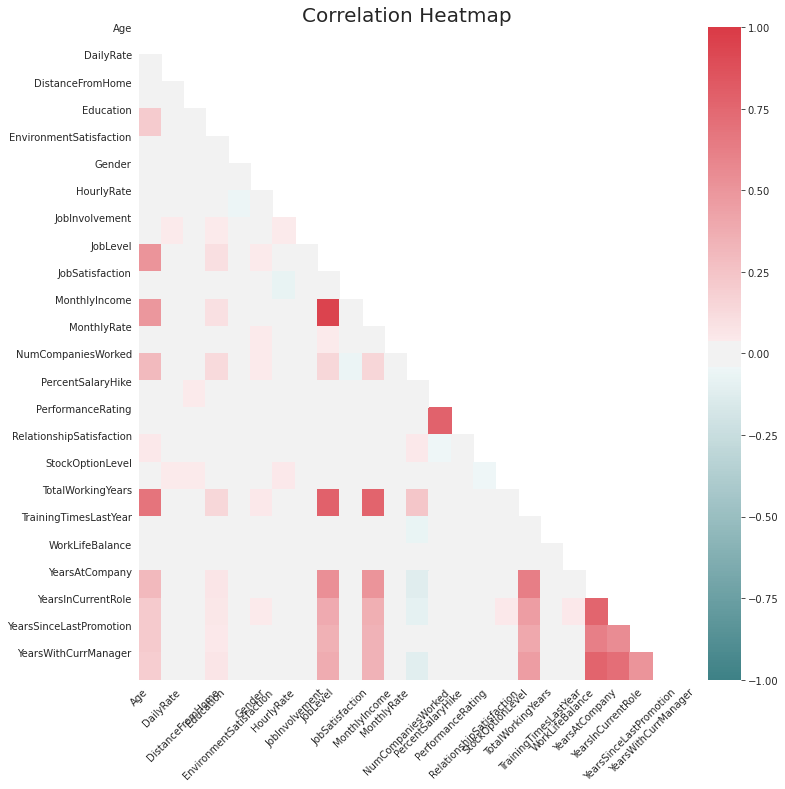

In [33]:
#definition of the function for the headmap 

def halfheatmap (df, mirrow, title ): 
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (12,12))
    colormap = sns.diverging_palette (220,10, as_cmap = True)
    ax.set_title(title, fontsize = 20)
    
    #mirrow basically means if we want to have every correlation in one or twice (we choose once)
    if mirrow == True:
        #Generate Heat Map, allow annotations and place floats in map
        sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
      #Apply xticks
        plt.xticks(range(len(corr.columns)), corr.columns);
      #Apply yticks
        plt.yticks(range(len(corr.columns)), corr.columns)
      #show plot
    
    else: 
        #drop selcorrelation
        dropself= np.zeros_like (corr)
        dropself [np.triu_indices_from(dropself)] = True
        colormap = sns.diverging_palette (200,10,as_cmap = True)
        sns.heatmap(corr, cmap=colormap, annot=False, fmt=".2g", mask=dropself, vmax = 1, vmin=-1)
         # Apply xticks
        plt.xticks(range(len(corr.columns)), corr.columns, rotation = 45);
        # Apply yticks
        plt.yticks(range(len(corr.columns)), corr.columns)
        
    # show plot and save it 
    plt.savefig("Happiness.Correlation.Heatmap.png")
    plt.show()
    
halfheatmap(df = hr_df, mirrow = False, title = "Correlation Heatmap")



Comment: 
    
- We see all variables an their correlation with each other variable 
- We see that most variables are only weakly correlated with one another (light color tone)
- If there is a correlation the correlation seems to be rather positive (red colors)
- For instance: Jobs satisfaction and Years at company are postively correlated (not suprisingly)


Note for the creation the heatmap**: 

- make sure that vmin and vmax are set to -1 and +1 repsectively. 
- set the color code appropriate (I suggest two colors to see the direction of the correlation directly) 
- be aware of the limitatios of the representation and only take it as an overview 



# OLS summary with statsmodels.api as sm
with several explanatory variables 

In [34]:
#get insides to the regession line 


"""confidence interval by default 95%


#note: that does not work ! the reason for that is: 
we need to define the variables prior to calling them for the summary statistics 



we are now including more and more varibales and see that the R^2 increases 
"""

import statsmodels.api as sm 

x = hr_dummy[["DailyRate", "Age", "DailyRate", "DistanceFromHome", "Education", "EnvironmentSatisfaction", "HourlyRate", "JobInvolvement", "JobLevel", "JobSatisfaction", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear","WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager", "Gender_0", "JobRole_Healthcare Representative", "JobRole_Human Resources", "JobRole_Laboratory Technician", "JobRole_Manager", "JobRole_Manufacturing Director", "JobRole_Research Director", "JobRole_Research Scientist", "JobRole_Sales Executive", "JobRole_Sales Representative", "BusinessTravel_Non-Travel", "BusinessTravel_Travel_Frequently", "BusinessTravel_Travel_Rarely", "Department_Human Resources", "Department_Sales", "Department_Research & Development", "OverTime_No", "Over18_Y","MaritalStatus_Single", "MaritalStatus_Married", "MaritalStatus_Divorced" ]]
y = hr_dummy["Attrition_No"]


X = sm.add_constant(x)
model = sm.OLS(y, X)
est = model.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:           Attrition_No   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     12.20
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           1.51e-64
Time:                        09:07:17   Log-Likelihood:                -404.19
No. Observations:                1470   AIC:                             888.4
Df Residuals:                    1430   BIC:                             1100.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
DailyR

# OLS with all Xns

In [35]:

"""
I got an error here and therefore, had to convert my int8 and int64
    to floats 
 
"""
hr_dummy = hr_dummy.astype (float)


x = np.column_stack ([hr_dummy.iloc [:,1:]])

y = hr_dummy["Attrition_No"]

X = sm.add_constant(x, prepend = True)
model = sm.OLS(y, X).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:           Attrition_No   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     12.20
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           1.51e-64
Time:                        09:07:17   Log-Likelihood:                -404.19
No. Observations:                1470   AIC:                             888.4
Df Residuals:                    1430   BIC:                             1100.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
DailyR

Note: we are speaking about a binary variable and therefore a classifier is much prefered (to a linear regression)

Why are people leaving their (consultancy) company ? For the given dataset we have identified a few main drivers companies can focus on: 
    